In [3]:
import corpus
import os

In [2]:
import CaboCha
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
from time import sleep

In [62]:
c = CaboCha.Parser()
tree = c.parse('そう言われると緊張するなあ。じゃあこうしよう。')
print(tree.toString(CaboCha.FORMAT_LATTICE))

* 0 1D 0/0 0.821629
そう	副詞,助詞類接続,*,*,*,*,そう,ソウ,ソー
* 1 2D 0/2 2.897897
言わ	動詞,自立,*,*,五段・ワ行促音便,未然形,言う,イワ,イワ
れる	動詞,接尾,*,*,一段,基本形,れる,レル,レル
と	助詞,格助詞,引用,*,*,*,と,ト,ト
* 2 5D 1/2 -1.192231
緊張	名詞,サ変接続,*,*,*,*,緊張,キンチョウ,キンチョー
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
なあ	助詞,終助詞,*,*,*,*,なあ,ナア,ナー
。	記号,句点,*,*,*,*,。,。,。
* 3 5D 0/0 -1.192231
じゃあ	接続詞,*,*,*,*,*,じゃあ,ジャア,ジャー
* 4 5D 0/0 -1.192231
こう	副詞,助詞類接続,*,*,*,*,こう,コウ,コー
* 5 -1D 0/1 0.000000
しよ	動詞,自立,*,*,サ変・スル,未然ウ接続,する,シヨ,シヨ
う	助動詞,*,*,*,不変化型,基本形,う,ウ,ウ
。	記号,句点,*,*,*,*,。,。,。
EOS



In [4]:
def bunsetsu_list(tree):
    result = []
    chunkindex = 0
    for i in range(tree.size()):
        token = tree.token(i)
        if(token.chunk is not None):
            features = token.feature.split(',')
            result.append({'lemma':features[-3], 'link':token.chunk.link, 'index':chunkindex})
            chunkindex += 1
    return result

def search_candidate(known_word_index, blist):
    result = set()
    for b in blist:
        if((b['link'] == known_word_index) or (b['index'] == blist[known_word_index]['link'])):
            result.add(b['index'])
    return sorted(list(result))

In [5]:
cp = corpus.Corpus(os.path.join('moddata','nucc','data001.txt'))

In [6]:
dic = dict()

In [5]:
import math

def argtoxy(arg, r=1.):
    ret = [
        r * math.cos(arg * math.pi / 180),
        r * math.sin(arg * math.pi / 180)
    ]   
    return ret 

def xytoarg(x, y):
    ret = [
        math.sqrt(x*x + y*y),
        180 * math.atan2(y, x)/ math.pi
    ]
    return ret

In [8]:
print(xytoarg(1,1.73))

[1.9982242116439286, 59.97059823848534]


In [9]:
dic = dict()
with open(os.path.join('seeds', 'emot.txt')) as f:
    for w in f.readlines():
        sw, arg = w.split()
        dic[sw] = corpus.WordDicElement(sw)
        x, y = argtoxy(int(arg))
        dic[sw].set_value(x, y)

In [10]:
for i in dic.keys():
    print(str(dic[i]))

{lemma:驚く,r:1.0,position:[6.123233995736766e-17, 1.0],score:[],accesscount:0}
{lemma:びっくり,r:1.0,position:[6.123233995736766e-17, 1.0],score:[],accesscount:0}
{lemma:注意,r:1.0,position:[0.3420201433256688, 0.9396926207859083],score:[],accesscount:0}
{lemma:興奮,r:1.0,position:[0.6427876096865394, 0.766044443118978],score:[],accesscount:0}
{lemma:わくわく,r:1.0,position:[0.6427876096865394, 0.766044443118978],score:[],accesscount:0}
{lemma:元気,r:1.0,position:[0.8660254037844387, 0.49999999999999994],score:[],accesscount:0}
{lemma:嬉しい,r:1.0,position:[0.9396926207859084, 0.3420201433256687],score:[],accesscount:0}
{lemma:幸せ,r:1.0,position:[0.984807753012208, 0.17364817766693033],score:[],accesscount:0}
{lemma:満足,r:1.0,position:[0.984807753012208, -0.17364817766693033],score:[],accesscount:0}
{lemma:落ち着く,r:1.0,position:[0.3420201433256688, -0.9396926207859083],score:[],accesscount:0}
{lemma:眠い,r:1.0,position:[6.123233995736766e-17, -1.0],score:[],accesscount:0}
{lemma:疲れる,r:1.0,position:[-0.1736481

In [11]:
dic

{'驚く': <corpus.WordDicElement at 0x105b20370>,
 'びっくり': <corpus.WordDicElement at 0x105e1c160>,
 '注意': <corpus.WordDicElement at 0x105e1ca00>,
 '興奮': <corpus.WordDicElement at 0x105f168b0>,
 'わくわく': <corpus.WordDicElement at 0x105f16e80>,
 '元気': <corpus.WordDicElement at 0x105f16910>,
 '嬉しい': <corpus.WordDicElement at 0x105f16f70>,
 '幸せ': <corpus.WordDicElement at 0x105f16be0>,
 '満足': <corpus.WordDicElement at 0x105f16310>,
 '落ち着く': <corpus.WordDicElement at 0x105f16850>,
 '眠い': <corpus.WordDicElement at 0x105f169a0>,
 '疲れる': <corpus.WordDicElement at 0x106ab5ca0>,
 'だるい': <corpus.WordDicElement at 0x106ab5f40>,
 '憂鬱': <corpus.WordDicElement at 0x106ab5b50>,
 '悲しい': <corpus.WordDicElement at 0x106ab5d30>,
 '辛い': <corpus.WordDicElement at 0x106ab5e80>,
 '嫌': <corpus.WordDicElement at 0x106ab5c40>,
 '心配': <corpus.WordDicElement at 0x106ab5b80>,
 '重圧': <corpus.WordDicElement at 0x106ab59d0>,
 '神経質': <corpus.WordDicElement at 0x106ab5cd0>,
 '怖い': <corpus.WordDicElement at 0x106ab5ee0>,
 '緊

In [12]:
def calc_score(cp, argdic):
    dic = argdic.copy()
    linecount = 0
    for line in cp.conversation:
        kk = []
        #print(linecount, line)
        linecount += 1
        for bindex, b in enumerate(line.bunsetsu_index_list):
            bunsetsu_head = line.sentence_word_list[b]
            try:
                dic[bunsetsu_head.lemma].accesscount += 1
                #print(dic[bunsetsu_head.lemma].isactive)
                if(dic[bunsetsu_head.lemma].isactive and not dic[bunsetsu_head.lemma].isdeleted):
                    candidates = [line.bunsetsu_index_list[i] for i in line.search_candidate(bindex)]
                    for candidate_index in candidates:
                        candidate = line.sentence_word_list[candidate_index]
                        kk.append([bunsetsu_head.lemma, candidate.lemma])
                        try:
                            dic[candidate.lemma].add_score(corpus.extract(bunsetsu_head, candidate, dic))
                        except KeyError:
                            newword = corpus.WordDicElement(candidate.lemma)
                            newword.add_score(corpus.extract(bunsetsu_head, candidate, dic))
                            dic[candidate.lemma] = newword
            except KeyError:
                continue
        if(len(kk) > 0):
            with open('kkout.txt', encoding='utf-8', mode='a') as f:
                f.write(f"[{line.text}]\n")
                f.write('\n'.join([f'{i[0]}->{i[1]}' for i in kk])+'\n')
    return dic

def calc_value(argdic: dict[corpus.WordDicElement], learntime: int, alpha: float=0.5, ):
    dic = argdic.copy()
    for key in dic.keys():
        elem = dic[key]
        if(elem.accesscount > learntime*1000):
            pass
        elif(len(elem.score) < 1):
            continue
        elif(elem.isdeleted):
            continue
        elif(elem.isactive):
            xscore = [i[0] for i in elem.score]
            yscore = [i[1] for i in elem.score]
            newxvalue = sum(xscore)/len(elem.score) * alpha + elem.value_x * (1-alpha)
            newyvalue = sum(yscore)/len(elem.score) * alpha + elem.value_y * (1-alpha)
            dic[key].set_value(newxvalue, newyvalue)
        else:
            xscore = [i[0] for i in elem.score]
            yscore = [i[1] for i in elem.score]
            newxvalue = sum(xscore)/len(elem.score)
            newyvalue = sum(yscore)/len(elem.score)
            dic[key].set_value(newxvalue, newyvalue)
        dic[key].reset_score()
            
    return dic

In [13]:
learntime = 0

In [67]:
learntime += 1
filecount = 0
for file in sorted(os.listdir(os.path.join('moddata','nucc')))[:]:    
    filecount += 1
    print(learntime, filecount)
    cp = corpus.Corpus(os.path.join('moddata','nucc',file))
    dic = calc_score(cp, dic)
dic = calc_value(dic, learntime)

output = []
for i in dic.keys():
    if(-0.6 < xytoarg(dic[i].value_x, dic[i].value_y)[0] < 0.6 or dic[i].accesscount > 1000 * learntime):
        dic[i].set_value(0., 0.)
        dic[i].delete()
    else:
        output.append(str(dic[i]))
with open(f'emodict/output1_{learntime}.txt', mode='w') as f:
    f.write('\n'.join(sorted(output, key=lambda x: int(x.split(':')[-1].replace('}','')), reverse=True)))

2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
2 62
2 63
2 64
2 65
2 66
2 67
2 68
2 69
2 70
2 71
2 72
2 73
2 74
2 75
2 76
2 77
2 78
2 79
2 80
2 81
2 82
2 83
2 84
2 85
2 86
2 87
2 88
2 89
2 90
2 91
2 92
2 93
2 94
2 95
2 96
2 97
2 98
2 99
2 100
2 101
2 102
2 103
2 104
2 105
2 106
2 107
2 108
2 109
2 110
2 111
2 112
2 113
2 114
2 115
2 116
2 117
2 118
2 119
2 120
2 121
2 122
2 123
2 124
2 125
2 126
2 127
2 128
2 129


In [ ]:
count = 0

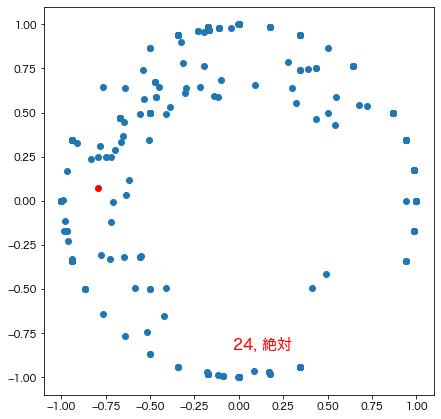

In [74]:


plt.rcParams['font.family'] = 'Hiragino Sans'
fig = plt.figure(figsize=(7,7), dpi=72)
ax = fig.add_subplot(111)
x = []
y = []
spx = []
spy = []
with open('emodict/output1_1.txt') as f:
    fl = [json.loads(i) for i in f.readlines()]
    for i, d in enumerate(fl):
        if(i != count):
            x.append(d['position'][0])
            y.append(d['position'][1])
        else:
            spx.append(d['position'][0])
            spy.append(d['position'][1])
    lemma = fl[count]['lemma']
    fig.text(0.5, 0.2, f'{count}, {lemma}', c='red', fontsize=15)
    ax.scatter(x, y)
    ax.scatter(spx, spy, c='red')
count += 1

In [55]:
wordelem = fl[count]
fig.text(0.5, 0.2, wordelem['lemma'], c='red')
ax.scatter(wordelem['position'][0], wordelem['position'][1])
fig.show()


/var/folders/pf/qj02gyvd6m71pmrhvt3k4f_80000gn/T/ipykernel_38704/1012639918.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [39]:
fonts = set([f.name for f in mpl.font_manager.fontManager.ttflist])
print(sorted(fonts))

['.Aqua Kana', '.Keyboard', '.New York', '.SF Arabic', '.SF Compact', '.SF Compact Rounded', '.SF NS Mono', '.SF NS Rounded', 'Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'American Typewriter', 'Andale Mono', 'Apple Braille', 'Apple Chancery', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'Baghdad', 'Bangla MN', 'Bangla Sangam MN', 'Baskerville', 'Beirut', 'Big Caslon', 'Bodoni 72', 'Bodoni 72 Oldstyle', 'Bodoni 72 Smallcaps', 'Bodoni Ornaments', 'Bradley Hand', 'Brush Script MT', 'Chalkboard', 'Chalkboard SE', 'Chalkduster', 'Charter', 'Cochin', 'Comic Sans MS', 'Copperplate', 'Corsiva Hebrew', 'Courier', 'Courier New', 'DIN Alternate', 'DIN Condensed', 'Damascus', 'DecoType Naskh', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Displ

In [72]:
learntime
count2 = 0

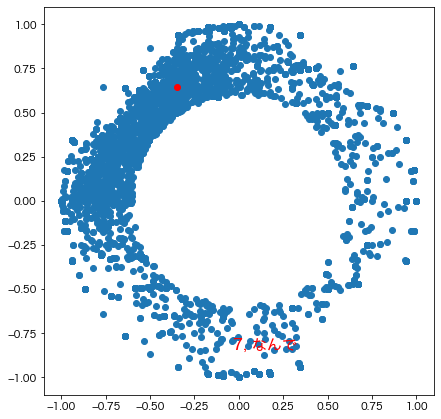

In [81]:
plt.rcParams['font.family'] = 'Hiragino Sans'
fig2 = plt.figure(figsize=(7,7), dpi=72)
ax2 = fig2.add_subplot(111)
x2 = []
y2 = []
spx2 = []
spy2 = []
with open('emodict/output1_2.txt') as f:
    fl = [json.loads(i) for i in f.readlines()]
    for i, d in enumerate(fl):
        if(i != count):
            x2.append(d['position'][0])
            y2.append(d['position'][1])
        else:
            spx2.append(d['position'][0])
            spy2.append(d['position'][1])
    lemma = fl[count2]['lemma']
    fig2.text(0.5, 0.2, f'{count2}, {lemma}', c='red', fontsize=15)
    ax2.scatter(x2, y2)
    ax2.scatter(spx2, spy2, c='red')
count2 += 1

In [8]:
with open('emodict/output1_2.txt') as f:
    fl = [json.loads(i) for i in f.readlines()]
emodic2 = dict()
for i in fl:
    emodic2[i['lemma']] = i['position']

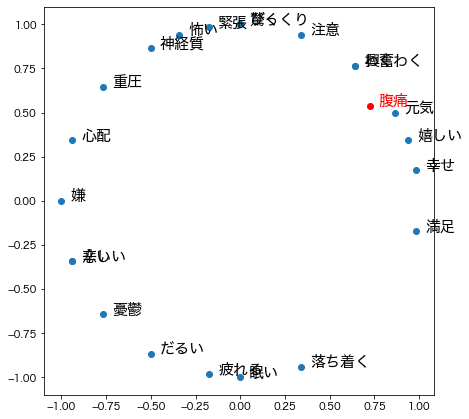

In [22]:
plt.rcParams['font.family'] = 'Hiragino Sans'
fig3 = plt.figure(figsize=(7,7), dpi=72)
ax3 = fig3.add_subplot(111)
x3 = []
y3 = []
tag3 = []
spx3 = []
spy3 = []
spword3 = '腹痛'
with open('seeds/emot.txt') as f:
    fl = f.readlines()
    for i in fl:
        lemma, arg = i.split()
        xp, yp = argtoxy(int(arg))
        x3.append(xp)
        y3.append(yp)
        tag3.append(lemma)
        ax3.text(xp+0.05, yp, lemma, fontsize=15)

ax3.scatter(x3, y3)
spx3.append(emodic2[spword3][0])
spy3.append(emodic2[spword3][1])
ax3.text(spx3[0]+0.05, spy3[0], spword3, fontsize=15, c='red')
ax3.scatter(spx3, spy3, c='red')

In [88]:
len(x3)
len(tag3)

22